In [6]:
import pandas as pd

df = pd.read_csv("annotated_bicodemix_publicsa_v2.csv")

print(df.head())

      id                                       post/keyword  \
0  28987  Taiping Perak Banjir 28/08/2022 #azrulazim352 ...   
1  28988  Taiping Perak Banjir 28/08/2022 #azrulazim352 ...   
2  28989  Taiping Perak Banjir 28/08/2022 #azrulazim352 ...   
3  28990  banjir simpang 4 benoni #banjir2022 Publish: 1...   
4  28991  banjir simpang 4 benoni #banjir2022 Publish: 1...   

                                       comment/tweet      username like count  \
0        sius la awk..bnjir sana..kwn xckp ape pon??  33d2a31d-c13          1   
1  srikota, taman sg mas, air kuning semua banjir...  61957789-224          0   
2  massyaallah.. . dasyatnya bnjir kali nie kawan...  cffa43d1-936          2   
3                               Simpang p papar kan?  c3128b6f-2e5          2   
4                       nasib baik lah sempat limpas  813bbc92-ca2          1   

     replied to reply count 2nd level comment/ reply time created  \
0           ---           1                       No    29/8/2022

In [7]:
df = df[(df['lang_id'] == 'en') & (df['comment/tweet'].str.split().str.len() >= 10)]
df = df[['comment/tweet', 'majority_sarc', 'majority_sent']]
df.rename(columns={"majority_sarc": "sarcasm", "majority_sent": "sentiment", "comment/tweet": "text"}, inplace=True)
list_texts = df['text'].tolist()
list_texts = ['"'+text.replace('"', "'")+'"' for text in list_texts]
df['text'] = list_texts
df = df.dropna()

df['sentiment'] = df['sentiment'].map({'positive': "1", 'negative': "0", 'neutral': "2"})
df['sarcasm'] = df['sarcasm'].map({'sarc': "1", 'notsarc': "0"})

df.head(), df.shape

(                                                  text sarcasm sentiment
 157  "This parking lot is not a new news btw. It ha...       0         0
 158  "GLOBAL WARMING LA. GOD ASKS YOU TO SOLVE IT. ...       1         0
 365  "??????????????am so happy to see all this hap...       0         0
 491  "Why no one Question our Billions dollars SMAR...       1         0
 599  "banjir kilat. happens when govt don't improve...       0         0,
 (618, 3))

In [8]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")

Training set size: 494
Validation set size: 124


In [9]:
import csv
train_df.to_csv("train_SS.csv", index=False, quoting=csv.QUOTE_NONE, escapechar='\\')
val_df.to_csv("valid_SS.csv", index=False, quoting=csv.QUOTE_NONE, escapechar='\\')

In [ ]:
from dataset_bicodemix import BicodemixDataSet
train_ds = BicodemixDataSet(
    root_folder='', file_name='train_SS.csv',
    classes=['0', '1', '2'],
    tokenizer=None,
    min_length=1,
    max_length=200
)

In [5]:
import pandas as pd

df = pd.read_csv("train_SS.csv")
mean_length = df['text'].str.split().str.len().mean()
print(f"Mean text length in training set: {mean_length}")

Mean text length in training set: 24.781376518218625


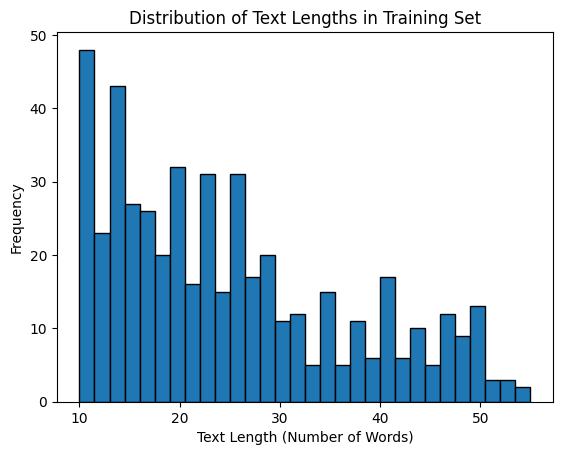

In [6]:
df_text_list = df['text'].tolist()
lengths = [len(text.split()) for text in df_text_list]
import matplotlib.pyplot as plt 
plt.hist(lengths, bins=30, edgecolor='black')
plt.title('Distribution of Text Lengths in Training Set')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df_count = df.groupby(['sentiment', 'sarcasm']).count().reset_index()
df_count.head()

,sentiment,sarcasm,text
0,0,0,132
1,0,1,60
2,1,0,124
3,1,1,37
4,2,0,141


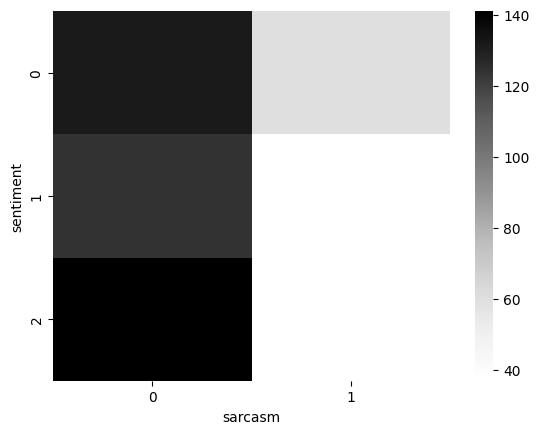

In [20]:
sns.heatmap(df_count.pivot(values='text', index='sentiment', columns='sarcasm'), cmap='Grays')
plt.show()